# Project 2: Data Wrangling and Visualization- WeRateDogs Twitter Data

The dataset I will be wrangling (analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

##  Data Gathering

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json
import re
import requests
import tweepy

#### Loading WeRateDogs Twitter archive data and read it pandas data frame  (twitter_archive_enhanced.csv)

In [57]:
# I downloaded the twitter-arcive-enhanced and uploaded from the Udacity Project folder and read it into a Pandas DataFrame

df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

#### Loading the Tweet image prediction (image_predictions.tsv) using the Request library

In [58]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [59]:
# Saving the image prediction into a tsv file
with open('image_predictions.tsv', 'wb') as file: 
    file.write(response.content)

In [60]:
# I downloaded the image-predictions from the provided url in the Udacity Project using the request library

img_pred = pd.read_csv('image_predictions.tsv', sep='\t')

#### Loading the tweets retrieved from twitter into a dataframe

In [61]:
tweet_json = pd.read_json('tweet_json.txt', lines=True)

## Assessing Data

### Assessing Twitter archive file

In [62]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Checking for Data shape

In [8]:
df_twitter.shape

(2356, 17)

To get more infrmation on the data

In [63]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### My observations on the dataset

- There are 2356 total row entries in the dataframe and consists of 17 column entries 
- There are only 78 values in the *in_reply_to_status_id* and *in_reply_to_user_id columns*.
- There are 181 non-null values in *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp columns*.
- 2297 non-null values are contained in the *expanded_urls*
- There are misrepresentation of NA value in different columns.
- *Timestamp* column appears to be a string, instead of datetime object.
- Dog stage appears to be in 4 stage

To get missing values in the dataset

In [64]:
df_twitter.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

To get the descriptive analysis on the numerical columns

In [65]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


From this description above, it's clearly seen that Both minimum and maximum ratings numerator and denominator are not correct as they are not are not suppose to be this low or high respectively

Lets now query the wrong rating_denominator by delcaring it as wrong_den

In [12]:
wrong_den = (df_twitter.query('rating_denominator != 10')[
    ['text', 'rating_numerator', 'rating_denominator']]
    .head())
wrong_den

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11


From here, I found that row 313, 342, 433, 516, and 784 have wrong rating_denominator 

To check for rating misrepresentation, I will declare it as wrong_rep

In [13]:
wrong_rep = (df_twitter[df_twitter['text']
                .str.contains(r'\d+\.\d+/\d+')]
                [['text', 'rating_numerator', 'rating_denominator']])
wrong_rep.head()

,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10


From here, it's now clearly seen that some rating_numeraors are actually misrepresented

In [14]:
wrong_rep.loc[45, 'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [15]:
wrong_rep.loc[340, 'text']

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [16]:
wrong_rep.loc[695, 'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [17]:
wrong_rep.loc[763, 'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [18]:
wrong_rep.loc[1689, 'text']

"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"

I can now see that;

- Some numerators and denominators were wrongly represented. For instance, Instead of 13.5/10, 5/10 was used, instead of 9.75/10, 75/10 was used, instaed of 11.27/10, 27/10 was used and instead of 9.5/10, 5/10 in the dataframe.
- Some text column are seen to have an unknow url at the end of the tweets.
-Row 340 and 695 appears to have similar tweet and with same rating

Since the normal interval is 14, let us query features of 10 ratings numerator that's less than 14

In [19]:
df_twitter.query('rating_numerator > 14')['text'].to_list()[:10]

['@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
 '@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
 '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
 'RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI',
 '@markhoppus 182/10',
 '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10',
 "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://

let us query features of 10 ratings denominator that's above 14 the normal interval of 10

In [20]:
df_twitter.query('rating_denominator > 10')['text'].to_list()[:10]

['@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whate

My ovservations:
    
-Some tweets doesn't  have ratings while dates were chosen to be ratings!

-Most tweets with higher ratings are not rating only one dog

#### Checking for Duplicate on the dataset

In [21]:
df_twitter.tweet_id.duplicated().any()

False

No duplicates found in the dataset

#### Checking for Dog Nmaes

In [22]:
df_twitter['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [23]:
df_twitter['name'].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

My observaton here is that there are some unknown dog names like "None", "a", "such", "the", "this", "unacceptable", "very" etc.

Now, lets check for unique values

In [24]:
for column in df_twitter.loc[:, "doggo":].columns:
    print(column, "column values:", df_twitter[column].unique())

doggo column values: ['None' 'doggo']
floofer column values: ['None' 'floofer']
pupper column values: ['None' 'pupper']
puppo column values: ['None' 'puppo']


### Assessing tweet information

In [25]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [26]:
#Checking for duplicates
tweet_json.id.duplicated().any()

False

Non appears to be duplicated

In [27]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Image Prediction

In [29]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
img_pred.shape

(2075, 12)

In [31]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Observations:
    
- There are 2075 enteries in the row with 12 columns
- There are Data quality issues which is the misrepresentation of tweet_id.
- inconsistent dog breed name i.e., uppercase and lowercase
- Names separated with "_" instead of " ".

#### To describe data

In [32]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Accessing Data

Here, I will assess the data visually and programmatically for quality and tidiness issues. My duty here is to detect and document at least eight (8) quality issues and two (2) tidiness issues

### Quality Issues

#### On Twitter Archive

- There are invalid dogs name e.g., "a", "such", "quite", "None", etc.
- Timestamp column appears to be a string, instead of datetime object.
- Some ratings are wrongly represented. For instance, Instead of 13.5/10, 5/10 was used, instead of 9.75/10, 75/10 was used, instaed of 11.27/10, 27/10 was used and instead of 9.5/10, 5/10 in the dataframe.
- There are misrepresentation of NA value in different column such as Doggo, Floofer, Pupper, Puppo etc.
- Appearance of unknown url at the end of some tweets
- There are invalid huge ratings numerator and denominator.
- Retweeted tweets and replies not needed.
- Retweet columns and replies not needed.

#### On Tweet Data

There appears an erroneous datatype (id)

#### On Image Prediction

- Dog breed names appears to be inconsistent that is, uppercase and lowercase
- There is misrepresentation of tweet_id.

### Tidiness Issues

#### On Twitter Archive

- Appearance of 2 variables in Timestamp column which are time and date
- Dog stages appears in multiple columns whereas it should be only in one column.

## Cleaning Data

Here, I will be cleaning all of the issues already documented while assessing the data.

I will perform the following steps:

- Before cleaning the data,I will make a copy of the original data.
- During cleaning,I will use the define-code-test framework and clearly document it.

Making a copy of the original data

In [123]:
df_twitter_clean = df_twitter.copy()
img_pred_clean = img_pred.copy()
tweet_json_clean = tweet_json.copy()

Using the define-code-test framework

## Quality Issues

### On Twitter Archive Data

### Quality Issue 1- Invalid Dog names e.g., "a", "such", "quite", "None", etc.

#### Define

To remove all dogs name with lower case and replace all "None" with np.nan in the dataframe.

#### Code

In [107]:
df_twitter_clean = df_twitter_clean[~df_twitter_clean.name.str.islower()]
df_twitter_clean.replace({"None": np.nan}, inplace=True)

#### Test

In [108]:
df_twitter_clean.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

### Quality Issue 2- Timestamp column appears to be a string, instead of datetime object.

#### Define

To convert timestamp column to datetime object and change the data type of id column to string using pandas.to_datetime() function

#### Code

In [36]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

df_twitter_clean.sort_values('timestamp', inplace=True)

#### Test

In [37]:
df_twitter_clean['timestamp'].head()

2355   2015-11-15 22:32:08+00:00
2351   2015-11-16 00:24:50+00:00
2344   2015-11-16 01:52:02+00:00
2343   2015-11-16 01:59:36+00:00
2342   2015-11-16 02:38:37+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [38]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,NaN,NaN,NaN,NaN,NaN
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,NaN,NaN,NaN,NaN,NaN
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,NaN,NaN,NaN,NaN,NaN


In [39]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 2355 to 0
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2247 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2247 non-null   datetime64[ns, UTC]
 4   source                      2247 non-null   object             
 5   text                        2247 non-null   object             
 6   retweeted_status_id         176 non-null    float64            
 7   retweeted_status_user_id    176 non-null    float64            
 8   retweeted_status_timestamp  176 non-null    object             
 9   expanded_urls               2188 non-null   object             
 10  rating_numerator            2247 non-null   int64           

As can be seen above through the data info and head function, I have susccesfully changed the timestamp to datetime object and the Id column has ben changed to string

### Quality Issue 3- Some ratings are wrongly represented. For instance, Instead of 13.5/10, 5/10 was used in the dataframe.

#### Define

To extract both ratings numerator and denominator from the text column, and also use astype() method to change their type from string to float.

#### Code

In [40]:
df_twitter_clean[['rating_numerator', 'rating_denominator']] = df_twitter_clean['text'].str.extract(r'([1-9][0-9]*(?:\.\d+)?)/([1-9][0-9]*)(?!/)', expand=True)

In [41]:
df_twitter_clean[['rating_numerator', 'rating_denominator']] = df_twitter_clean[['rating_numerator', 'rating_denominator']].astype(float)

#### Test

In [42]:
df_twitter_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN,NaN,NaN,NaN
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,NaN,NaN,NaN


In [109]:
df_twitter_clean['rating_numerator'].value_counts()

12      541
11      447
10      437
13      343
9       144
8        95
14       50
7        49
5        36
6        30
3        18
4        14
1         8
2         7
15        2
0         2
75        2
420       2
143       1
45        1
44        1
20        1
121       1
99        1
26        1
144       1
80        1
17        1
50        1
1776      1
165       1
27        1
24        1
84        1
960       1
182       1
666       1
88        1
Name: rating_numerator, dtype: int64

In [44]:
df_twitter_clean['rating_denominator'].value_counts()

10.0     2226
11.0        3
80.0        2
20.0        2
50.0        2
120.0       1
16.0        1
110.0       1
130.0       1
40.0        1
90.0        1
150.0       1
7.0         1
70.0        1
1.0         1
Name: rating_denominator, dtype: int64

In [45]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 2355 to 0
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2247 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2247 non-null   datetime64[ns, UTC]
 4   source                      2247 non-null   object             
 5   text                        2247 non-null   object             
 6   retweeted_status_id         176 non-null    float64            
 7   retweeted_status_user_id    176 non-null    float64            
 8   retweeted_status_timestamp  176 non-null    object             
 9   expanded_urls               2188 non-null   object             
 10  rating_numerator            2245 non-null   float64         

### Quality Issue 4- There are misrepresentation of NA value in different column such as Doggo, Floofer, Pupper, Puppo etc.

#### Define

To use dataframe.replace() function to replace all the "None" strings in the dog_stages columns

#### Code

In [111]:
df_twitter_clean.loc[:, "doggo":'puppo'] = df_twitter_clean.loc[:, "doggo":'puppo'].replace({'None': np.nan})

#### Test

In [110]:
df_twitter_clean.loc[:5, "doggo":'puppo']

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


In [112]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2247 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2247 non-null   object 
 4   source                      2247 non-null   object 
 5   text                        2247 non-null   object 
 6   retweeted_status_id         176 non-null    float64
 7   retweeted_status_user_id    176 non-null    float64
 8   retweeted_status_timestamp  176 non-null    object 
 9   expanded_urls               2188 non-null   object 
 10  rating_numerator            2247 non-null   int64  
 11  rating_denominator          2247 non-null   int64  
 12  name                        1502 non-null   object 
 13  doggo                       93 no

### Quality Issue 5- Appearance of unknown url at the end of some tweets

#### Define

To remove the url at the end of some tweets using replace() method in str function

#### Code

In [113]:
df_twitter_clean['text'] = df_twitter_clean['text'].str.replace(r'\s*http\S*', "", regex=True)

#### Test

In [114]:
df_twitter_clean['text'].str.contains('http').sum()

0

### Quality Issue 6- There are invalid huge ratings numerator and denominator

#### Define

To use pandas query() method to extract dataframe with ratings denominator of 10 and ratings numerator <= 14. I will also evaluate the rating_numerator column by dividing it by 10.

#### Code

In [67]:
df_twitter_clean = df_twitter_clean.query('rating_denominator == 10 & rating_numerator <= 14')
df_twitter_clean['final_ratings'] = df_twitter_clean['rating_numerator']

In [52]:
df_twitter_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### Test

In [53]:
df_twitter_clean['final_ratings'].head()

2355     8.0
2351     5.0
2344     9.0
2343    10.0
2342     6.0
Name: final_ratings, dtype: float64

In [54]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 2355 to 0
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2218 non-null   int64              
 1   in_reply_to_status_id       68 non-null     float64            
 2   in_reply_to_user_id         68 non-null     float64            
 3   timestamp                   2218 non-null   datetime64[ns, UTC]
 4   source                      2218 non-null   object             
 5   text                        2218 non-null   object             
 6   retweeted_status_id         174 non-null    float64            
 7   retweeted_status_user_id    174 non-null    float64            
 8   retweeted_status_timestamp  174 non-null    object             
 9   expanded_urls               2167 non-null   object             
 10  name                        1498 non-null   object          

### Quality Issue 7- Retweeted tweets and replies not needed

#### Define

To remove all retweeted tweets and replies

#### Code

In [115]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['retweeted_status_id'].isna()]
df_twitter_clean = df_twitter_clean[df_twitter_clean['in_reply_to_user_id'].isna()]

#### Test

In [116]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1993 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1993 non-null   object 
 4   source                      1993 non-null   object 
 5   text                        1993 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1990 non-null   object 
 10  rating_numerator            1993 non-null   int64  
 11  rating_denominator          1993 non-null   int64  
 12  name                        1390 non-null   object 
 13  doggo                       80 no

### Quality Issue 8- Retweeted tweets and replies not needed

#### Define

To drop all retweeted tweets and replies columns using drop() method in pandas

#### Code

In [75]:
colto_drop = (i for i in df_twitter_clean.columns if re.search(r'retweet.*|in_reply.*', i))

df_twitter_clean.drop(columns=colto_drop, inplace=True)

#### Test

In [117]:
df_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [118]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1993 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1993 non-null   object 
 4   source                      1993 non-null   object 
 5   text                        1993 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1990 non-null   object 
 10  rating_numerator            1993 non-null   int64  
 11  rating_denominator          1993 non-null   int64  
 12  name                        1390 non-null   object 
 13  doggo                       80 no

### On Tweet Data

### Quality Issue 9 - There appears an erroneous datatype (id)

#### Define

To change the datatype of tweet_id column in both image prediction and tweets additional info table to string using astype() method in pandas

#### Code

In [147]:
tweet_json_clean['id'] = tweet_json_clean['id'].astype(str)

#### Test

In [148]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### On Image Prediction

#### Quality Issue 10 - Dog breed names appears to be inconsistent that is, uppercase and lowercase

#### Define

Replace "_" with " " and capitalize all dog breeds.

#### Code

In [150]:
# replacing all underscore with space
img_pred_clean['dog_breed'] = img_pred_clean['dog_breed'].str.replace("_", " ")

KeyError: 'dog breed'

### On Tidiness Issues

### Tidiness Issue 1-  Apperearnce of 2 variables in Timestamp column which are time and date

#### Define

To extract both time and date from the timestamp object and delete the timestamp column after extraction.

#### Code

In [ ]:
df_twitter_clean['date'] = pd.to_datetime(df_twitter_clean['timestamp'].dt.date)
df_twitter_clean['time'] = df_twitter_clean['timestamp'].dt.time

Removing timestamp from the dataframe

In [ ]:
df_twitter_clean.drop(columns=['timestamp'], inplace=True)

#### Test

In [78]:
df_twitter_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,final_ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13


In [79]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2075 non-null   int64 
 1   timestamp           2075 non-null   object
 2   source              2075 non-null   object
 3   text                2075 non-null   object
 4   expanded_urls       2072 non-null   object
 5   rating_numerator    2075 non-null   int64 
 6   rating_denominator  2075 non-null   int64 
 7   name                2075 non-null   object
 8   doggo               2075 non-null   object
 9   floofer             2075 non-null   object
 10  pupper              2075 non-null   object
 11  puppo               2075 non-null   object
 12  final_ratings       2075 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 227.0+ KB


### Tidiness Issue 2- Dog stages appears in multiple columns whereas it should be only in one column.

#### Define

To use melt() method to get all values of dog stages in one column and remove all redundant dog stage columns which are 'doggo', 'floofer', 'pupper', 'puppo'

#### Code

In [128]:
dog_stage = df_twitter_clean.melt(id_vars= ['tweet_id'],
                value_vars=('doggo', 'floofer', 'pupper', 'puppo'),
                    var_name='dogs_col', value_name='dog_stage')

dog_stage = dog_stage[~dog_stage['dog_stage'].isna()].drop('dogs_col', axis=1)

df_twitter_clean = pd.merge(df_twitter_clean, dog_stage, on='tweet_id', how='left')

dog_stage is no longer

In [129]:
del dog_stage 

In [130]:
df_twitter_clean['dog_stage'] = df_twitter_clean['dog_stage'].astype('category')

df_twitter_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [131]:
df_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [81]:
df_twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,final_ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12


In [132]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    9424 non-null   int64   
 1   in_reply_to_status_id       312 non-null    float64 
 2   in_reply_to_user_id         312 non-null    float64 
 3   timestamp                   9424 non-null   object  
 4   source                      9424 non-null   object  
 5   text                        9424 non-null   object  
 6   retweeted_status_id         724 non-null    float64 
 7   retweeted_status_user_id    724 non-null    float64 
 8   retweeted_status_timestamp  724 non-null    object  
 9   expanded_urls               9188 non-null   object  
 10  rating_numerator            9424 non-null   int64   
 11  rating_denominator          9424 non-null   int64   
 12  name                        9424 non-null   object  
 13  dog_stage         

### Restructure and Rename Data

For clarity of purpose, I will be restrcturing and renaming some column which are 
- expanded_urls to tweet_url
- name to dog_name

To rename the columns, expanded_urls and to tweet_url and name to dog_name

In [144]:
df_twitter_clean.rename(columns={'expanded_urls': 'tweet_url', 'name': 'dog_name'}, inplace=True)

In [134]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


## Storing Data

In [135]:
df_twitter_clean.to_csv('twitter_archive_master.csv')

## Analyzing and visualizing data

In this section, I will analyze and visualize my wrangled data. 

In [90]:
data_visual = df_twitter_clean

In [136]:
data_visual.head()

,tweet_id,timestamp,source,text,tweet_url,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,final_ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12


### Dog Rating distribution

I will be plotting the histogram of Dog rating distribution as against the freqency it occurs

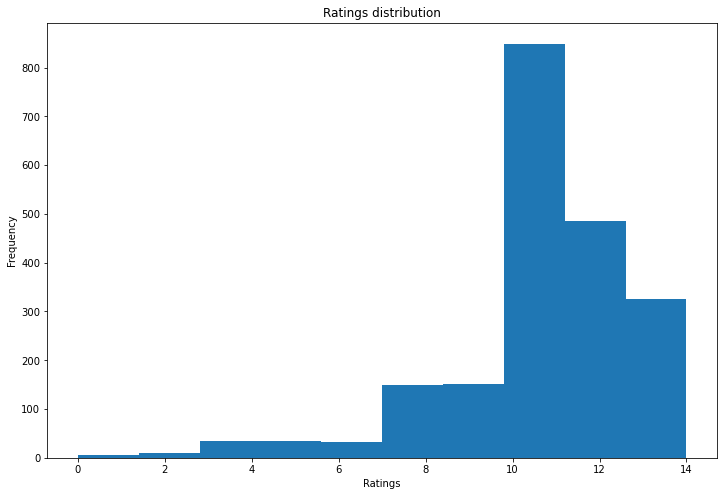

In [137]:
plt.figure(figsize=(12, 8))
data_visual['final_ratings'].plot(kind='hist')
plt.xlabel('Ratings')
plt.title('Ratings distribution');

#### Observation

This clearly shows that the Dog Ratings distribution is skewed to the left, meaning that most of the ratings falls between 10 and 14

#### To find Dogs with the highest ratings

In [138]:
dog_ratings = data_visual[['dog_name', 'final_ratings']].dropna()
dog_ratings.set_index('dog_name', inplace=True)

In [139]:
dog_ratings = dog_ratings['final_ratings'].sort_values(ascending=False)

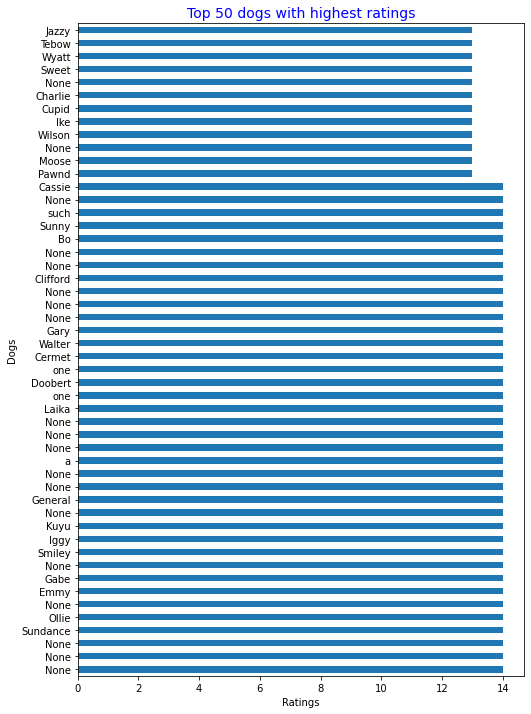

In [140]:
fig, ax = plt.subplots(figsize=(8, 12))
dog_ratings.head(50).plot.barh()
ax.set_ylabel("Dogs")
ax.set_xlabel('Ratings')
ax.set_title("Top 50 dogs with highest ratings", size=14, color='b');

#### My Observation

These are the top 50 dogs tweet that are given highest ratings by WeRateDog

### To find the Most common dogs breed

Dog stage count with na values

In [146]:
stage_count = (data_visual['dog_name']
                .value_counts()
                    )

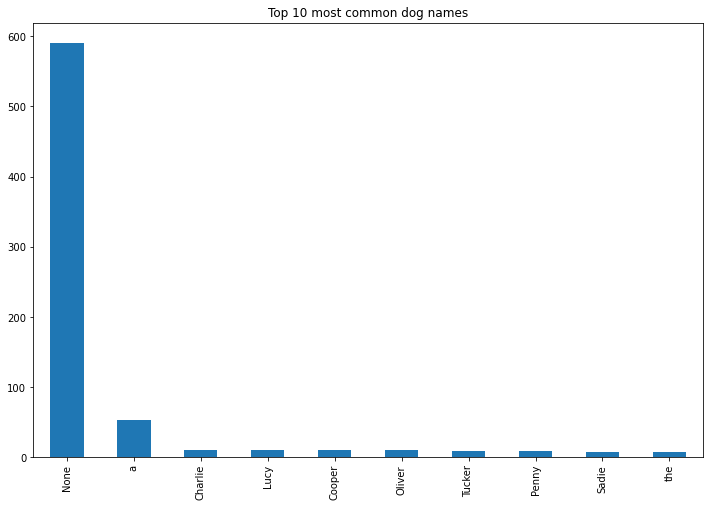

In [143]:
stage_count.head(10).plot.bar(
    figsize=(12, 8), 
    title="Top 10 most common dog names"
);